## 🌬️ The Weather Today In Paris 🌡️

### Libraries

In [92]:
import requests
import json
from pymongo import MongoClient
from datetime import datetime
import pandas as pd
import numpy as np
from pandas import json_normalize
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

### Openweather Connexion

In [5]:
json_file_path = r'C:\Users\Catello\Desktop\IAMDA1\NoSQL - Mr Chafik\PyMango_Project\config.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

api_key = data.get('api_key', None)

if api_key:
    print(f"Clé récupérée")
else:
    print("La clé n'a pas été trouvée dans le fichier JSON.")

Clé récupérée


### MongoDB Compass Connexion

In [6]:
client = MongoClient('mongodb://localhost:27017/')
filter={}

result = client['Pymango_project']['openweather'].find(
  filter=filter
)

#### Get the information of the city

In [7]:
city_name = "paris"

url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'
print(url)

req = requests.get(url)
data = req.json()

print(data)

https://api.openweathermap.org/data/2.5/weather?q=paris&appid=03b4ca62593f93e7459b1b93fa684c7a
{'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 282.45, 'feels_like': 280.24, 'temp_min': 281.17, 'temp_max': 283.63, 'pressure': 1004, 'humidity': 70}, 'visibility': 9000, 'wind': {'speed': 4.12, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1709894110, 'sys': {'type': 2, 'id': 2041230, 'country': 'FR', 'sunrise': 1709878682, 'sunset': 1709919890}, 'timezone': 3600, 'id': 2988507, 'name': 'Paris', 'cod': 200}


In [8]:
type(data)

dict

#### MongoDB Document storage

In [75]:
data['record_date'] = datetime.now()

In [9]:
client['Pymango_project']['openweather'].insert_one(data)

InsertOneResult(ObjectId('65eaeb6b033749139fabba09'), acknowledged=True)

### Data Cleaning

#### Normalization

In [48]:
df = json_normalize(data)

df

,weather,base,visibility,dt,timezone,id,name,cod,record_date,_id,...,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,9000,1709894110,3600,2988507,Paris,200,2024-03-08 11:41:47.323944,65eaeb6b033749139fabba09,...,1004,70,4.12,110,0,2,2041230,FR,1709878682,1709919890


In [49]:
df["weather"].iloc[0]

[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]

In [50]:
df["weather_id"] = df["weather"].apply(lambda x: x[0]["id"])
df["weather_main"] = df["weather"].apply(lambda x: x[0]["main"])
df["weather_description"] = df["weather"].apply(lambda x: x[0]["description"])
df["weather_icon"] = df["weather"].apply(lambda x: x[0]["icon"])
df.drop("weather", axis=1, inplace=True)

df.iloc[0]

base                                     stations
visibility                                   9000
dt                                     1709894110
timezone                                     3600
id                                        2988507
name                                        Paris
cod                                           200
record_date            2024-03-08 11:41:47.323944
_id                      65eaeb6b033749139fabba09
coord.lon                                  2.3488
coord.lat                                 48.8534
main.temp                                  282.45
main.feels_like                            280.24
main.temp_min                              281.17
main.temp_max                              283.63
main.pressure                                1004
main.humidity                                  70
wind.speed                                   4.12
wind.deg                                      110
clouds.all                                      0


#### Datetype conversion

In [101]:
numpy_datetime = df['record_date'].values[0]
standard_datetime = np.datetime_as_string(numpy_datetime, unit='D')

formatted_date = datetime.strptime(standard_datetime, "%Y-%m-%d").strftime('%d/%m/%Y')

In [96]:
print(f"Today {formatted_date} in {df['name'].values[0]} the weather is {df['weather_main'].values[0]} and visibility is up to {round(df['visibility'].values[0]/1000)} Km ")


Today 08/03/2024 in Paris the weather is Clear and visibility is up to 9 Km 


#### Temperature conversion

In [51]:
temperature_kelvin = df.iloc[0]['main.temp']
feels_like_kelvin = df.iloc[0]['main.feels_like']
temp_min_kelvin = df.iloc[0]['main.temp_min']
temp_max_kelvin = df.iloc[0]['main.temp_max']

temperature_celsius = temperature_kelvin - 273.15
feels_like_celsius = feels_like_kelvin - 273.15
temp_min_celsius = temp_min_kelvin - 273.15
temp_max_celsius = temp_max_kelvin - 273.15

df.at[0, 'main.temp'] = temperature_celsius
df.at[0, 'main.feels_like'] = feels_like_celsius
df.at[0, 'main.temp_min'] = temp_min_celsius
df.at[0, 'main.temp_max'] = temp_max_celsius

df.iloc[0]

base                                     stations
visibility                                   9000
dt                                     1709894110
timezone                                     3600
id                                        2988507
name                                        Paris
cod                                           200
record_date            2024-03-08 11:41:47.323944
_id                      65eaeb6b033749139fabba09
coord.lon                                  2.3488
coord.lat                                 48.8534
main.temp                                     9.3
main.feels_like                              7.09
main.temp_min                                8.02
main.temp_max                               10.48
main.pressure                                1004
main.humidity                                  70
wind.speed                                   4.12
wind.deg                                      110
clouds.all                                      0


Today 08/03/2024 in Paris the weather is Clear and visibility is up to 9 Km 


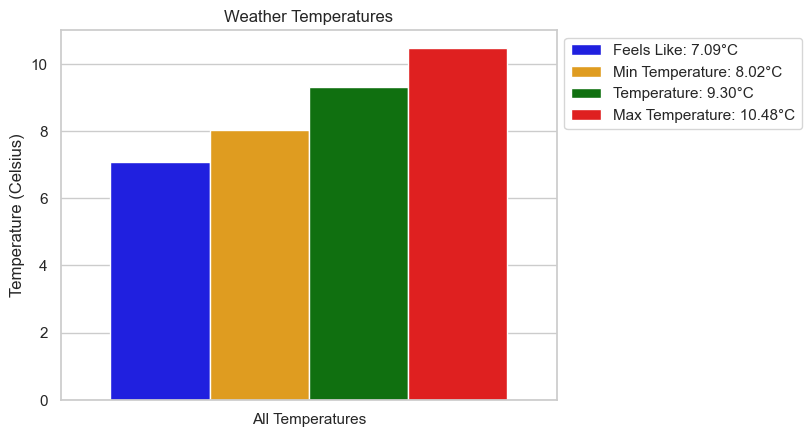

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

temperature = df.at[0, 'main.temp']
feels_like = df.at[0, 'main.feels_like']
temp_min = df.at[0, 'main.temp_min']
temp_max = df.at[0, 'main.temp_max']

labels = ['Temperature', 'Feels Like', 'Min Temperature', 'Max Temperature']
values = [temperature, feels_like, temp_min, temp_max]

sorted_values, sorted_labels = zip(*sorted(zip(values, labels)))

colors = ['blue', 'orange', 'green', 'red']

sns.set(style="whitegrid")
fig, ax = plt.subplots()

sns.barplot(x=['All Temperatures']*len(sorted_values), y=sorted_values, hue=sorted_labels, palette=colors, ax=ax)

ax.set_ylabel('Temperature (Celsius)')
ax.set_title('Weather Temperatures')

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, (value, label) in enumerate(zip(sorted_values, sorted_labels)):
    legend.texts[i].set_text(f'{label}: {value:.2f}°C')

title = f"Today {formatted_date} in {df['name'].values[0]} the weather is {df['weather_main'].values[0]} and visibility is up to {round(df['visibility'].values[0]/1000)} Km "

print(title)

plt.show()
